# Sentiment Analysis: Machine & Deep Learnings Benchmark

Authors: Konstantin Danilov, Denis Molin

## Objectives

This work is focused on ***sentiment analysis*** with ***Deep Learning*** using ***Keras*** and ***Tensorflow/Tensorflow-gpu*** on Python. ***Machine Learning*** algorithms will also be implemented and compared with ***Deep Learning*** implementations.

## Datasets

Binary and multiclass classification will be covered by two datasets:
* the [Large Movie Review Dataset](http://ai.stanford.edu/~amaas/data/sentiment/) that contains movie reviews labelled onto two classes: positive and negative;
* the [the Rotten Tomatoes dataset](https://www.kaggle.com/c/sentiment-analysis-on-movie-reviews/data) that contains movie reviews labelled onto 5 classes (0 - negative,1 - somewhat negative,2 - neutral,3 - somewhat positive,4 - positive)

We also use a stop word list in english available in the *stopwords.en.txt* file.

### Large Movie Review Dataset (LMRD)

This dataset is made of 2 sets of 25,000 text files of labelled movie reviews: half with positive reviews, half with negative reviews. These 2 sets are stored in two directories named *train* and *test*. Positive and negative reviews are stored in two different subdirectories: *neg* and *pos*. The label of the review is the directory name where the review is stored.

In [48]:
# pathes where the text files are stored
LMRD_train_path = "./aclImdb/train/"
LMRD_test_path = "./aclImdb/test/"

# build a data frame of two columns with the text of the review in the first
# column and the class of the review in the second column: 1 for positive, 
# 0 for negative. We store the data frame in a csv file for comodity.
import os.path as op
from glob import glob
import pandas as pd
import numpy as np

def imdb_data_preprocess(inpath, outpath="./", name="imdb_training.csv", mix=False):
    
   filenames_neg = sorted(glob(op.join(inpath, 'neg', '*.txt')))
   filenames_pos = sorted(glob(op.join(inpath, 'pos', '*.txt')))
   
   texts_neg = [open(f, 'rt', encoding='latin1').read() for f in filenames_neg]
   texts_pos = [open(f, 'rt', encoding='latin1').read() for f in filenames_pos]

   texts = texts_neg + texts_pos
   y     = np.ones(len(texts), dtype=np.int)
   y[:len(texts_neg)] = 0    

   d = {'text':texts,'polarity':y}
   mydf = pd.DataFrame(data=d)
   
   mydf.to_csv(op.join(outpath,name),sep=',',index=True,index_label='',header=True,columns=["text","polarity"])

print("preprocess the training data & store the preprocessed data into the idbm_training.csv file")
imdb_data_preprocess(LMRD_train_path)

print("preprocess the test data & store the preprocessed data into the ibdm_test.csv file")
imdb_data_preprocess(LMRD_test_path, name="imdb_test.csv")


preprocess the training data & store the preprocessed data into the idbm_training.csv file
preprocess the test data & store the preprocessed data into the ibdm_test.csv file


## Machine Learning Approach

First, we load the english stop word list.

In [49]:
#read the stop words
print("read the stop words")
stop_words = open('stopwords.en.txt').read()
stop_words = stop_words.split(sep="\n")
stop_words.pop()

#read the data
print("read the preprocessed data from the csv file")
df = pd.read_csv('imdb_training.csv', encoding='latin1')

read the stop words
read the preprocessed data from the csv file


### Bag-of-Word

Here we transform the data using n-gram representations.

***EXPLANATION OF WHAT BAG OF WORD IS AND WHAT N-GRAM MEANS***

#### Unigram representation

In [56]:
from sklearn.feature_extraction.text import CountVectorizer

# make the unigram representation
print("make the unigram representation")
myCountVectorizerUnigram = CountVectorizer(ngram_range=(1, 1), analyzer='word', stop_words=stop_words)
X_unigram = myCountVectorizerUnigram.fit_transform(df.text)

make the unigram representation


#### Bigram representation

In [57]:
# make the bigram representation
print("make the bigram representation")
myCountVectorizerBigram = CountVectorizer(ngram_range=(1, 2), analyzer='word', stop_words=stop_words)
X_bigram = myCountVectorizerBigram.fit_transform(df.text)


make the bigram representation


#### Unigram representation (term-frequency times inverse document-frequency)

In [58]:
from sklearn.feature_extraction.text import TfidfVectorizer
print("make the bigramtfidf representation")
myTfidfVectorizerUnigram = TfidfVectorizer(ngram_range=(1, 2), analyzer='word', stop_words=stop_words)
X_unigram_tfidf= myTfidfVectorizerUnigram.fit_transform(df.text)


make the bigramtfidf representation


#### Bigram representation (term-frequency times inverse document-frequency)

In [59]:
print("make the bigramtfidf representation")
myTfidfVectorizerBigram = TfidfVectorizer(ngram_range=(1, 2), analyzer='word', stop_words=stop_words)
X_bigram_tfidf = myTfidfVectorizerBigram.fit_transform(df.text)


make the bigramtfidf representation


### Model training & testing

In [60]:
from sklearn import linear_model

# read the test data
print("read the test data")
df_test = pd.read_csv('imdb_test.csv',encoding='latin1')

# train a SGD classifier 
print("train a SGD classifier using a given representation")
myClassifier = linear_model.SGDClassifier(loss="hinge",penalty="l1")
myClassifier.fit(X_unigram,df.polarity)

# make the unigram representation of the test data
X_test = myCountVectorizerUnigram.transform(df_test.text)

# test the SGD classifier on the test data
print("test the SGD classifier on the test data")
res = myClassifier.predict(X_test)



read the test data
train a SGD classifier using a given representation


C:\Users\DM250067\AppData\Local\Continuum\anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


test the SGD classifier on the test data


In [61]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(df_test.polarity, res)

import matplotlib.pyplot as plt
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[10899  1601]
 [ 2088 10412]]


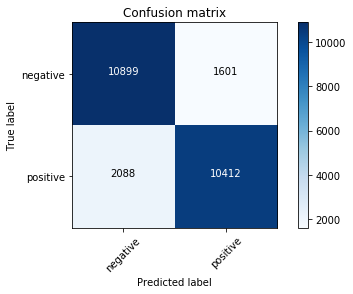

In [62]:
plot_confusion_matrix(cm, {'negative': 0, 'positive': 1})

In [63]:
print("model accuracy: "+str((cm[0,0]+cm[1,1])/sum(sum(cm))*100)+"%")

model accuracy: 85.244%


train a SGD classifier using a given representation


C:\Users\DM250067\AppData\Local\Continuum\anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


test the SGD classifier on the test data
Confusion matrix, without normalization
[[10992  1508]
 [ 1329 11171]]
model accuracy: 88.652%


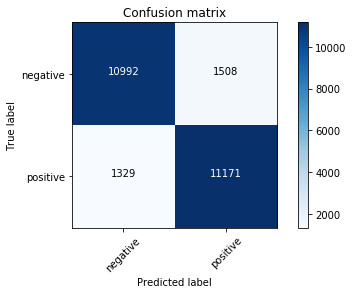

In [67]:
# train a SGD classifier 
print("train a SGD classifier using a given representation")
myClassifier = linear_model.SGDClassifier(loss="hinge",penalty="l2")
myClassifier.fit(X_bigram_tfidf,df.polarity)

# make the unigram representation of the test data
X_test = myTfidfVectorizerBigram.transform(df_test.text)

# test the SGD classifier on the test data
print("test the SGD classifier on the test data")
res = myClassifier.predict(X_test)

# confusion matrix computation & plot
cm = confusion_matrix(df_test.polarity, res)
plot_confusion_matrix(cm, {'negative': 0, 'positive': 1})
print("model accuracy: "+str((cm[0,0]+cm[1,1])/sum(sum(cm))*100)+"%")